In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
import pandas as pd

# Replace the filename with the exact one you uploaded
df = pd.read_csv('data.csv')  # example: 'uvvis_195_198.txt'
df.head()


,Baseline 100%T,Unnamed: 1,195,Unnamed: 3,198,Unnamed: 5,Unnamed: 6
0,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,NaN
1,3040,10,3040,-0.361723274,3040,-0.1492400318,NaN
2,3044.099121,10,3044.099121,-0.1977719069,3044.099121,-0.2032958716,NaN
3,3048.197998,10,3048.197998,-0.4353569448,3048.197998,-0.1244355068,NaN
4,3052.297119,3.906856537,3052.297119,10,3052.297119,10,NaN


In [ ]:
import pandas as pd

df = pd.read_csv('uvvis_195_198.txt')  # This is the correct file name
df.head()


,Baseline 100%T,Unnamed: 1,195,Unnamed: 3,198,Unnamed: 5,Unnamed: 6
0,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,NaN
1,3040,10,3040,-0.361723274,3040,-0.1492400318,NaN
2,3044.099121,10,3044.099121,-0.1977719069,3044.099121,-0.2032958716,NaN
3,3048.197998,10,3048.197998,-0.4353569448,3048.197998,-0.1244355068,NaN
4,3052.297119,3.906856537,3052.297119,10,3052.297119,10,NaN


In [ ]:
df.columns


Index(['Baseline 100%T', 'Unnamed: 1', '195', 'Unnamed: 3', '198',
       'Unnamed: 5', 'Unnamed: 6'],
      dtype='object')

In [ ]:
df.columns = [
    'Baseline',        # Was 'Baseline 100%T'
    'Wavenumber_1',    # Was 'Unnamed: 1'
    'Abs_195',         # Was '195'
    'Wavenumber_2',    # Was 'Unnamed: 3'
    'Abs_198',         # Was '198'
    'Wavenumber_3',    # Was 'Unnamed: 5'
    'Extra_1'          # Was 'Unnamed: 6'
]

df.head()


,Baseline,Wavenumber_1,Abs_195,Wavenumber_2,Abs_198,Wavenumber_3,Extra_1
0,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,Wavenumber (cm-1),Abs,NaN
1,3040,10,3040,-0.361723274,3040,-0.1492400318,NaN
2,3044.099121,10,3044.099121,-0.1977719069,3044.099121,-0.2032958716,NaN
3,3048.197998,10,3048.197998,-0.4353569448,3048.197998,-0.1244355068,NaN
4,3052.297119,3.906856537,3052.297119,10,3052.297119,10,NaN


In [ ]:
# Convert text to numeric values (ignore errors)
df['Baseline'] = pd.to_numeric(df['Baseline'], errors='coerce')
df['Abs_195'] = pd.to_numeric(df['Abs_195'], errors='coerce')
df['Abs_198'] = pd.to_numeric(df['Abs_198'], errors='coerce')


In [ ]:
df['Corrected_195'] = df['Abs_195'] - df['Baseline']
df['Corrected_198'] = df['Abs_198'] - df['Baseline']

df[['Baseline', 'Abs_195', 'Corrected_195', 'Abs_198', 'Corrected_198']].head()


,Baseline,Abs_195,Corrected_195,Abs_198,Corrected_198
0,NaN,NaN,NaN,NaN,NaN
1,3040.000000,3040.000000,0.0,3040.000000,0.0
2,3044.099121,3044.099121,0.0,3044.099121,0.0
3,3048.197998,3048.197998,0.0,3048.197998,0.0
4,3052.297119,3052.297119,0.0,3052.297119,0.0


In [ ]:
df['Wavenumber_2'] = pd.to_numeric(df['Wavenumber_2'], errors='coerce')


In [ ]:
df_clean = df.dropna(subset=['Wavenumber_2', 'Corrected_195', 'Corrected_198'])


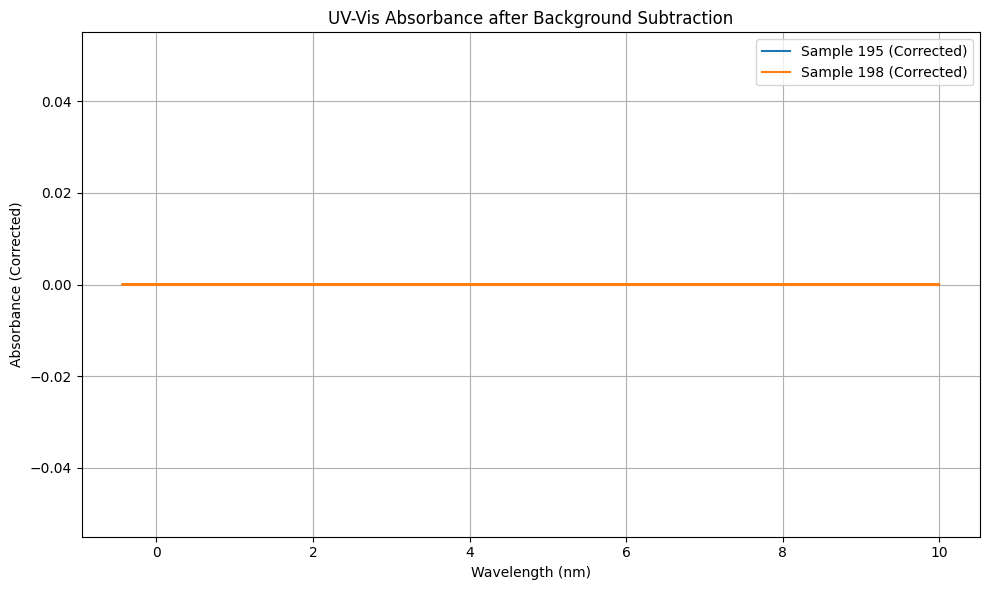

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(df_clean['Wavenumber_2'], df_clean['Corrected_195'], label='Sample 195 (Corrected)')
plt.plot(df_clean['Wavenumber_2'], df_clean['Corrected_198'], label='Sample 198 (Corrected)')

plt.xlabel('Wavelength (nm)')
plt.ylabel('Absorbance (Corrected)')
plt.title('UV-Vis Absorbance after Background Subtraction')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


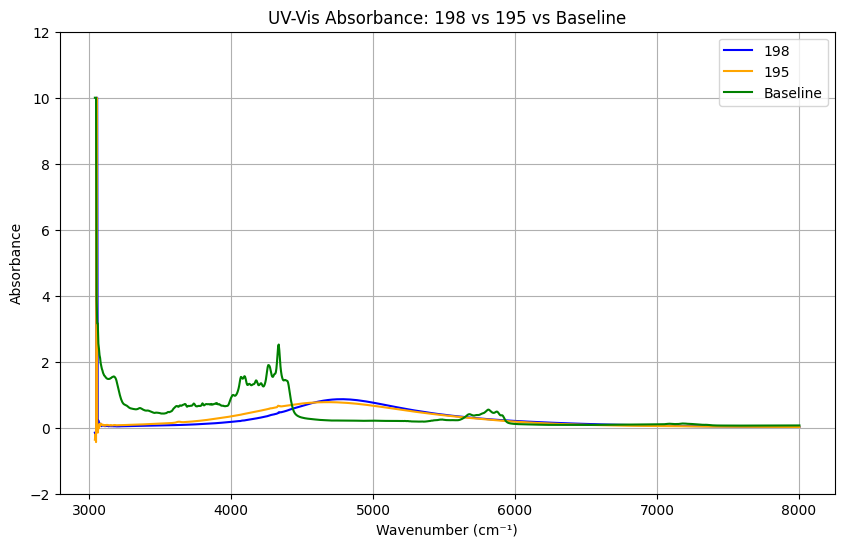

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV
df = pd.read_csv('data.csv', skiprows=1)

# Rename columns
df.columns = ['Wavenumber', 'Baseline', 'Wavenumber_195', 'Abs_195', 'Wavenumber_198', 'Abs_198', 'Extra']

# Convert to numeric
cols_to_convert = ['Wavenumber', 'Baseline', 'Abs_195', 'Abs_198']
df[cols_to_convert] = df[cols_to_convert].apply(pd.to_numeric, errors='coerce')

# Plot
plt.figure(figsize=(10, 6))
plt.plot(df['Wavenumber'], df['Abs_198'], label='198', color='blue')
plt.plot(df['Wavenumber'], df['Abs_195'], label='195', color='orange')
plt.plot(df['Wavenumber'], df['Baseline'], label='Baseline', color='green')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Absorbance')
plt.title('UV-Vis Absorbance: 198 vs 195 vs Baseline')
plt.legend()
plt.grid(True)
plt.ylim(-2, 12)
plt.show()


In [10]:
from google.colab import files
uploaded = files.upload()


Saving First_continuous.zip to First_continuous.zip


In [12]:
import zipfile
import os

# Find exact uploaded filename
uploaded_filename = [f for f in os.listdir('/content') if f.endswith('.zip')][0]

# Set paths
zip_path = f'/content/{uploaded_filename}'
extract_path = '/content/extracted'

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Check extracted folder contents
os.listdir(extract_path)



['First_continuous', '__MACOSX']

In [13]:
# Check the real folder inside extracted (likely named with spaces or parentheses)
for folder in os.listdir(extract_path):
    print("Folder found:", folder)
    print(os.listdir(os.path.join(extract_path, folder)))


Folder found: First_continuous
['20241003_70DMF_30EG_bkg.csv', '20241003_second_100_run.BSK', '20241003_second_100_run.csv', '20241003_bkg.DSW']
Folder found: __MACOSX
['First_continuous']


In [15]:
import pandas as pd

# Define paths to your CSV files
bg_path = '/content/extracted/First_continuous/20241003_70DMF_30EG_bkg.csv'
data_path = '/content/extracted/First_continuous/20241003_second_100_run.csv'

# Load the CSVs (skip the first row if it’s messy header)
background = pd.read_csv(bg_path, skiprows=1, header=None)
dataset = pd.read_csv(data_path, skiprows=1, header=None)

# Preview the shapes and a few rows
print("Background shape:", background.shape)
print("Dataset shape:", dataset.shape)

background.head(), dataset.head()


Background shape: (2522, 3)
Dataset shape: (3495, 183)


(                   0            1    2
 0  Wavenumber (cm-1)          Abs  NaN
 1               3034           10  NaN
 2               3036           10  NaN
 3               3038  3.636438847  NaN
 4               3040           10  NaN,
                  0            1                  2    3                  4    \
 0  Wavenumber (cm-1)          Abs  Wavenumber (cm-1)  Abs  Wavenumber (cm-1)   
 1               3034           10               3034   10               3034   
 2        3038.079102           10        3038.079102   10        3038.079102   
 3        3042.157959           10        3042.157959   10        3042.157959   
 4        3046.237061  3.631486893        3046.237061   10        3046.237061   
 
    5                  6    7                  8    9    ...          173  \
 0  Abs  Wavenumber (cm-1)  Abs  Wavenumber (cm-1)  Abs  ...          Abs   
 1   10               3034   10               3034   10  ...   4.29354763   
 2   10        3038.079102   10        3

In [16]:
import zipfile
import os

# First, make sure the zip file is still in your Colab. If not, re-upload it.
# Assuming the uploaded zip is named 'First_continuous.zip'
zip_path = '/content/First_continuous.zip'
extract_path = '/content/extracted'

# Re-extract the zip
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Confirm extraction
print("Extraction complete. Listing contents:")
print(os.listdir(extract_path))



Extraction complete. Listing contents:
['First_continuous', '__MACOSX']


In [17]:
import os

folder_path = '/content/extracted/First_continuous'

# List files in the actual data folder
print("Files inside 'First_continuous':")
print(os.listdir(folder_path))


Files inside 'First_continuous':
['20241003_70DMF_30EG_bkg.csv', '20241003_second_100_run.BSK', '20241003_second_100_run.csv', '20241003_bkg.DSW']


In [18]:
import pandas as pd

# Set the correct file paths
bg_path = '/content/extracted/First_continuous/20241003_70DMF_30EG_bkg.csv'
data_path = '/content/extracted/First_continuous/20241003_second_100_run.csv'

# Load the CSVs, skipping first row if it's not useful
background = pd.read_csv(bg_path, skiprows=1, header=None)
dataset = pd.read_csv(data_path, skiprows=1, header=None)

# Confirm shapes
print("Background shape:", background.shape)
print("Dataset shape:", dataset.shape)

# Optional peek at data
background.head(), dataset.head()


Background shape: (2522, 3)
Dataset shape: (3495, 183)


(                   0            1    2
 0  Wavenumber (cm-1)          Abs  NaN
 1               3034           10  NaN
 2               3036           10  NaN
 3               3038  3.636438847  NaN
 4               3040           10  NaN,
                  0            1                  2    3                  4    \
 0  Wavenumber (cm-1)          Abs  Wavenumber (cm-1)  Abs  Wavenumber (cm-1)   
 1               3034           10               3034   10               3034   
 2        3038.079102           10        3038.079102   10        3038.079102   
 3        3042.157959           10        3042.157959   10        3042.157959   
 4        3046.237061  3.631486893        3046.237061   10        3046.237061   
 
    5                  6    7                  8    9    ...          173  \
 0  Abs  Wavenumber (cm-1)  Abs  Wavenumber (cm-1)  Abs  ...          Abs   
 1   10               3034   10               3034   10  ...   4.29354763   
 2   10        3038.079102   10        3

In [19]:
# Remove the header row (row 0) which has text like "Wavenumber", "Abs", etc.
dataset_noheader = dataset.iloc[1:].reset_index(drop=True)

# Select every second column starting from column 1 (i.e., absorbance columns)
abs_cols = dataset_noheader.iloc[:, 1::2]

# Convert to numeric
abs_data = abs_cols.apply(pd.to_numeric, errors='coerce')

# Confirm shape (should be rows x number of spectra)
print("Absorbance data shape:", abs_data.shape)
abs_data.head()


Absorbance data shape: (3494, 91)


,1,3,5,7,9,11,13,15,17,19,...,163,165,167,169,171,173,175,177,179,181
0,10.000000,10.0,10.0,10.0,10.0,10.0,10.000000,3.773262,10.0,10.000000,...,10.0,10.0,10.0,10.0,10.0,4.293548,10.0,10.0,3.713090,10.0
1,10.000000,10.0,10.0,10.0,10.0,10.0,3.514886,10.000000,10.0,3.639484,...,10.0,10.0,10.0,10.0,10.0,4.091895,10.0,10.0,10.000000,10.0
2,10.000000,10.0,10.0,10.0,10.0,10.0,10.000000,10.000000,10.0,10.000000,...,10.0,10.0,10.0,10.0,10.0,10.000000,10.0,10.0,10.000000,10.0
3,3.631487,10.0,10.0,10.0,10.0,10.0,10.000000,10.000000,10.0,10.000000,...,10.0,10.0,10.0,10.0,10.0,10.000000,10.0,10.0,10.000000,10.0
4,3.079465,10.0,10.0,10.0,10.0,10.0,10.000000,10.000000,10.0,10.000000,...,10.0,10.0,10.0,10.0,10.0,10.000000,10.0,10.0,3.200086,10.0


In [20]:
# Drop header row and reset index
background_noheader = background.iloc[1:].reset_index(drop=True)

# Use only the absorbance column (column 1)
background_abs = pd.to_numeric(background_noheader.iloc[:, 1], errors='coerce')

# Truncate or pad background to match the number of rows in dataset
min_len = min(len(background_abs), abs_data.shape[0])
background_abs = background_abs.iloc[:min_len]
abs_data = abs_data.iloc[:min_len, :]

print("Final shapes for subtraction:")
print("Background length:", len(background_abs))
print("Absorbance data:", abs_data.shape)


Final shapes for subtraction:
Background length: 2521
Absorbance data: (2521, 91)


In [21]:
# Subtract background from each spectrum
corrected_data = abs_data.subtract(background_abs, axis=0)

corrected_data.head()


,1,3,5,7,9,11,13,15,17,19,...,163,165,167,169,171,173,175,177,179,181
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.226738,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-5.706452,0.000000,0.000000,-6.286910,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.485114,0.000000,0.000000,-6.360516,...,0.000000,0.000000,0.000000,0.000000,0.000000,-5.908105,0.000000,0.000000,0.000000,0.000000
2,6.363561,6.363561,6.363561,6.363561,6.363561,6.363561,6.363561,6.363561,6.363561,6.363561,...,6.363561,6.363561,6.363561,6.363561,6.363561,6.363561,6.363561,6.363561,6.363561,6.363561
3,-6.368513,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,-6.920535,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.799914,0.000000


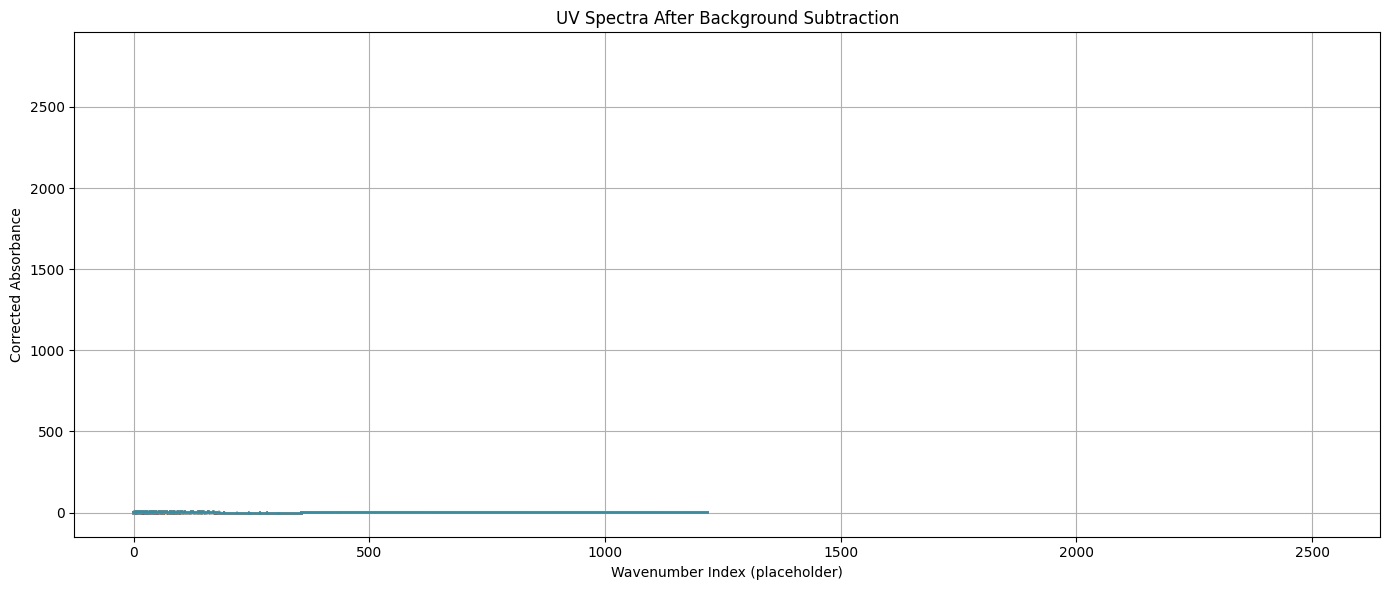

In [22]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))

for col in corrected_data.columns:
    plt.plot(corrected_data.index, corrected_data[col], alpha=0.6)

plt.title("UV Spectra After Background Subtraction")
plt.xlabel("Wavenumber Index (placeholder)")
plt.ylabel("Corrected Absorbance")
plt.grid(True)
plt.tight_layout()
plt.show()


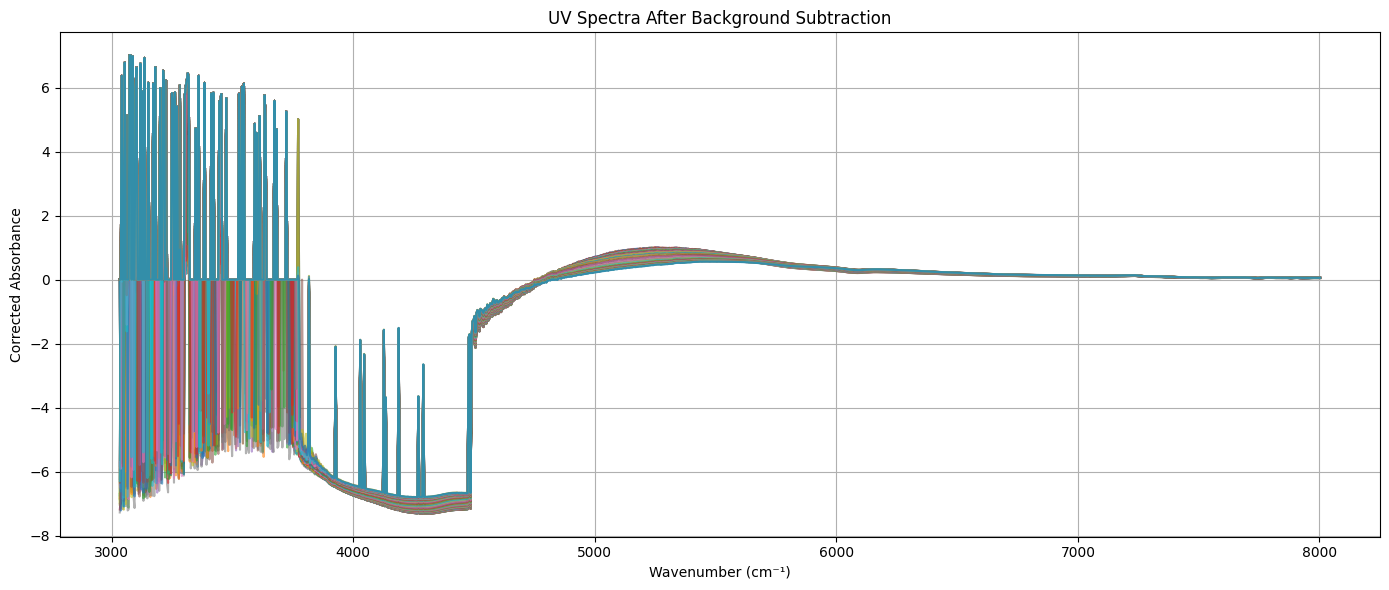

In [23]:
# Extract wavenumber values from column 0 (assuming same for all)
wavenumber = pd.to_numeric(dataset_noheader.iloc[:min_len, 0], errors='coerce')

# Plot with real wavenumber
plt.figure(figsize=(14, 6))
for col in corrected_data.columns:
    plt.plot(wavenumber, corrected_data[col], alpha=0.6)

plt.title("UV Spectra After Background Subtraction")
plt.xlabel("Wavenumber (cm⁻¹)")
plt.ylabel("Corrected Absorbance")
plt.grid(True)
plt.tight_layout()
plt.show()
